In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data =pd.read_csv('Index2018.csv')

In [3]:
df_comp =raw_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Text(0.5, 1.0, 'S&P vs FTSE')

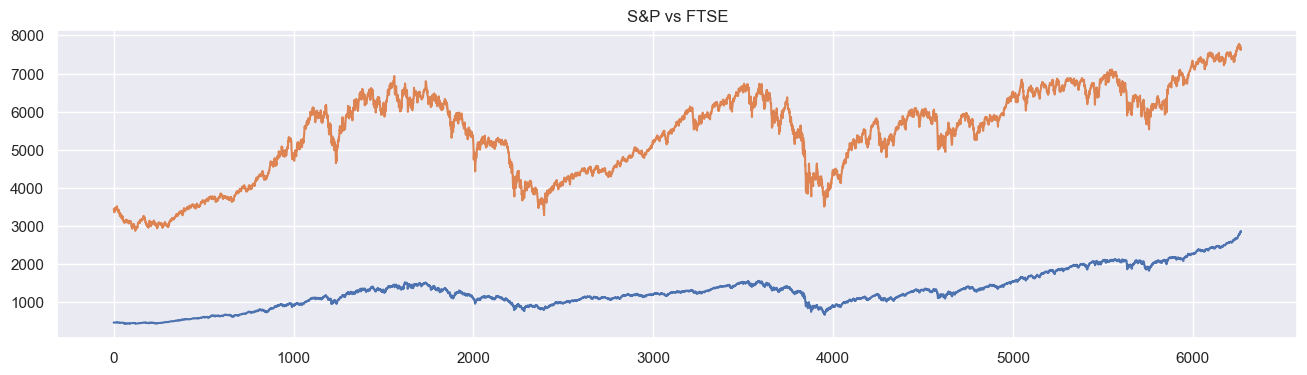

In [6]:
df_comp.spx.plot(figsize=(20,4),title='S&P Prices')
df_comp.ftse.plot(figsize=(16,4),title='FTSE Prices')
plt.title('S&P vs FTSE')

In [7]:
import scipy.stats
import pylab

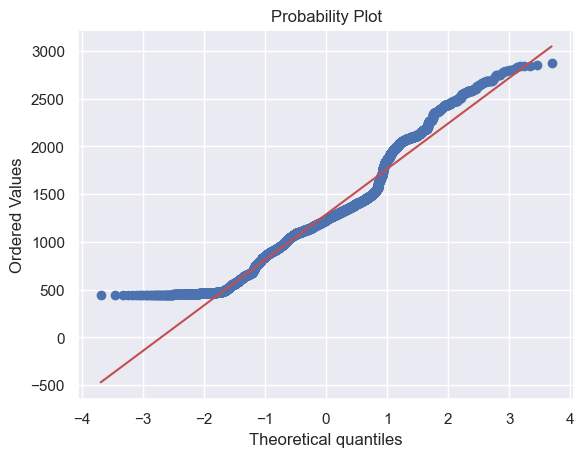

In [8]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
pylab.show()

In [9]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [10]:
df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)

In [11]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [12]:
df_comp.set_index('date',inplace=True)

In [13]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
df_comp = df_comp.asfreq('b')

In [15]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [17]:
df_comp.spx =df_comp.spx.fillna(method='ffill')
df_comp.dax =df_comp.dax.fillna(method='bfill')
df_comp.ftse =df_comp.ftse.fillna(value=df_comp.ftse.mean())
df_comp.nikkei =df_comp.nikkei.fillna(value=df_comp.nikkei.median())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8460\1153221046.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.spx =df_comp.spx.fillna(method='ffill')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8460\1153221046.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.dax =df_comp.dax.fillna(method='bfill')


In [18]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [19]:
df_comp['market_value'] = df_comp.spx

In [20]:
df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [21]:
del df_comp['spx'] ,df_comp['dax'] ,df_comp['ftse'] ,df_comp['nikkei']

In [22]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [23]:
size = int(len(df_comp)*.8)
size

5021

In [24]:
df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [25]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [26]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [27]:
Wn =np.random.normal(loc=df_comp.mean(),scale=df_comp.std(),size=len(df_comp))

In [28]:
df_comp['Wn'] = Wn

In [29]:
df_comp.describe()

,market_value,Wn
count,6277.000000,6277.000000
mean,1288.642547,1281.446320
std,487.868210,485.563521
min,438.920000,-462.504483
25%,992.715221,953.904870
50%,1233.761241,1282.346352
75%,1460.250000,1606.348428
max,2872.867839,3075.816611


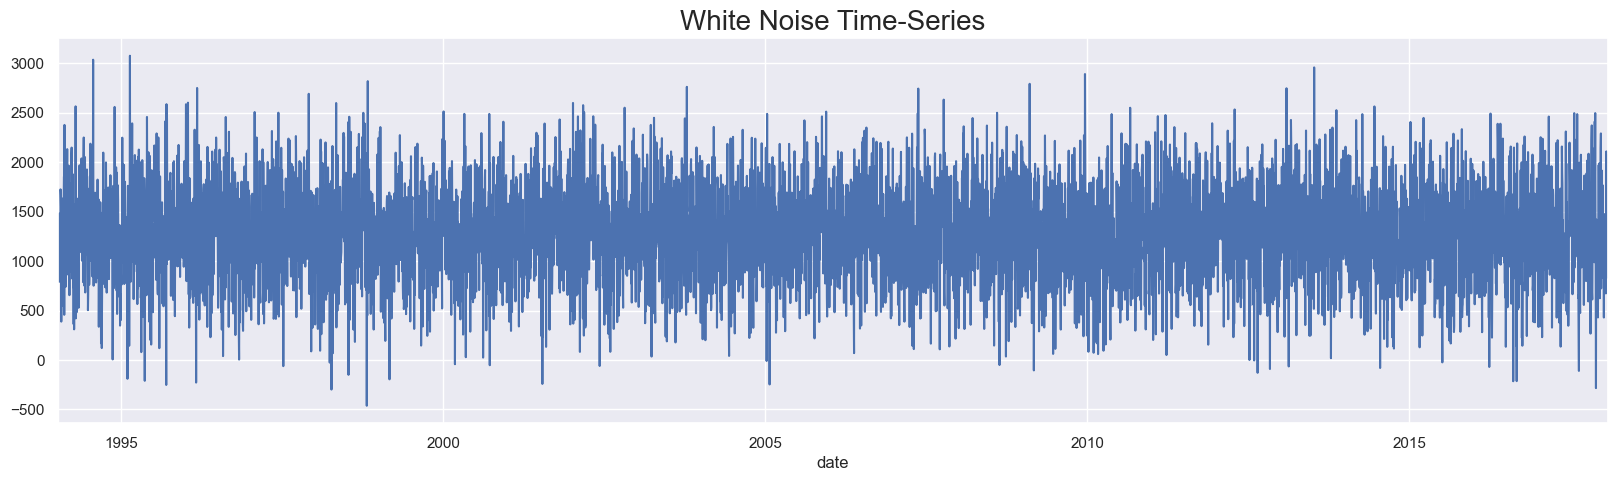

In [30]:
df_comp.Wn.plot(figsize=(20,5))
plt.title('White Noise Time-Series',size=20)
plt.show()

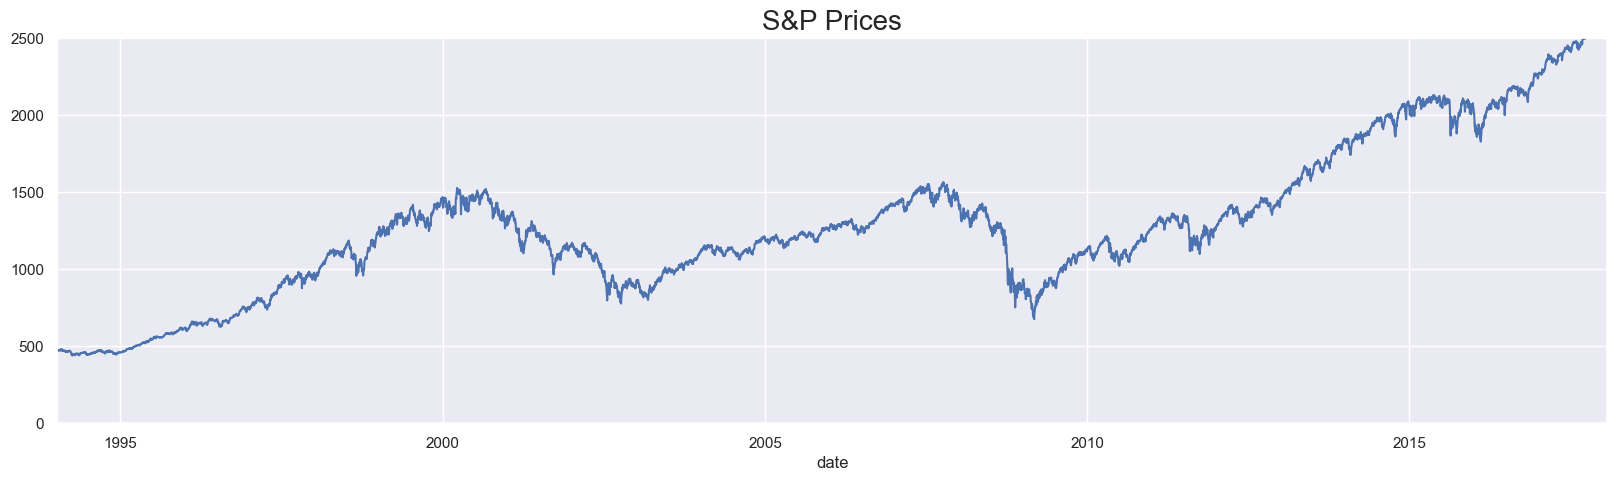

In [31]:
df_comp.market_value.plot(figsize=(20,5))
plt.title('S&P Prices',size=20)
plt.ylim(0,2500)
plt.show()

In [32]:
rw =pd.read_csv('RandWalk.csv')
rw.date =pd.to_datetime(rw.date,dayfirst=True)
rw.set_index('date',inplace=True)
rw =rw.asfreq('b')

In [33]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [34]:
df_comp['rw'] =rw

In [35]:
df_comp.head()

,market_value,Wn,rw
date,,,
1994-01-07,469.90,1237.006638,1122.139662
1994-01-10,475.27,1151.543172,1080.347860
1994-01-11,474.13,897.013313,1082.095245
1994-01-12,474.17,1012.233902,1083.639265
1994-01-13,472.47,942.014897,1067.146255


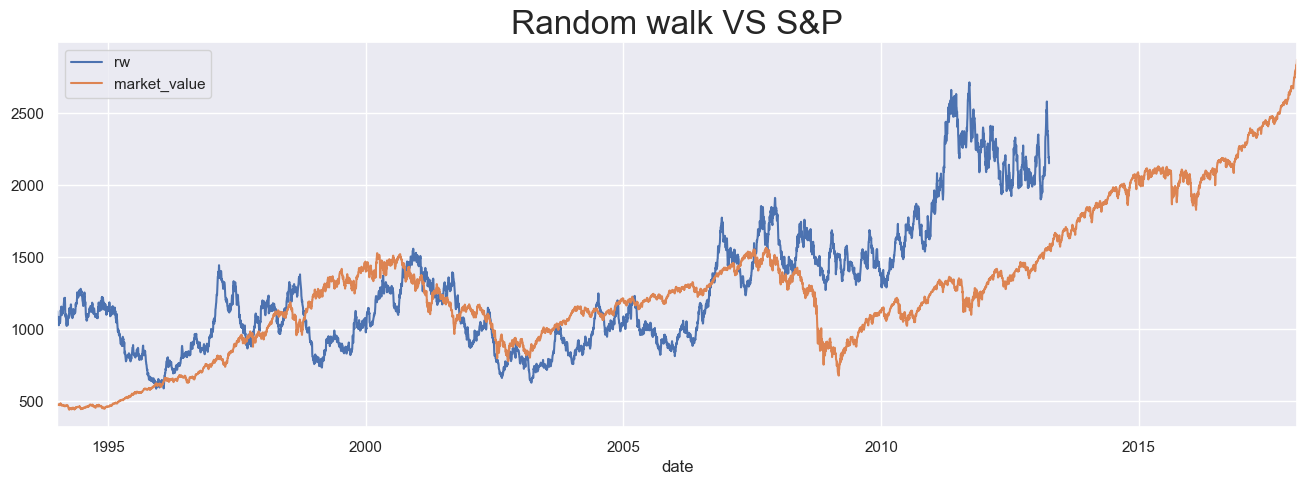

In [36]:
df_comp.rw.plot(figsize=(16,5))
df_comp.market_value.plot()
plt.title('Random walk VS S&P',size=24)
plt.legend()
plt.show()

In [37]:
import statsmodels.tsa.stattools as sts

In [38]:
sts.adfuller(df_comp.market_value)

(1.1194986381728387,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [39]:
sts.adfuller(df_comp.Wn)

(-78.44575874048546,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 94936.51116245602)

In [40]:
if np.isinf(df_comp.rw).any().any():
    df_comp.rw = df_comp.rw.replace([np.inf, -np.inf], np.nan)

if df_comp.rw.isna().any().any():
    df_comp.rw = df_comp.rw.fillna(method='ffill')  


result = sts.adfuller(df_comp.rw)
result

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8460\3592511008.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.rw = df_comp.rw.fillna(method='ffill')


(-1.3377157515360805,
 0.6117456205357755,
 24,
 6252,
 {'1%': -3.431396383066701,
  '5%': -2.8620024085488898,
  '10%': -2.5670161371235163},
 56526.358350839684)

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

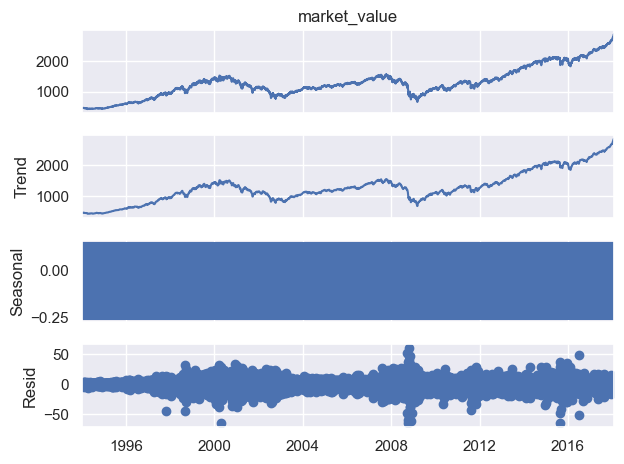

In [42]:
s_dec_additive =seasonal_decompose(df_comp.market_value,model='additive')
s_dec_additive.plot()
plt.show()

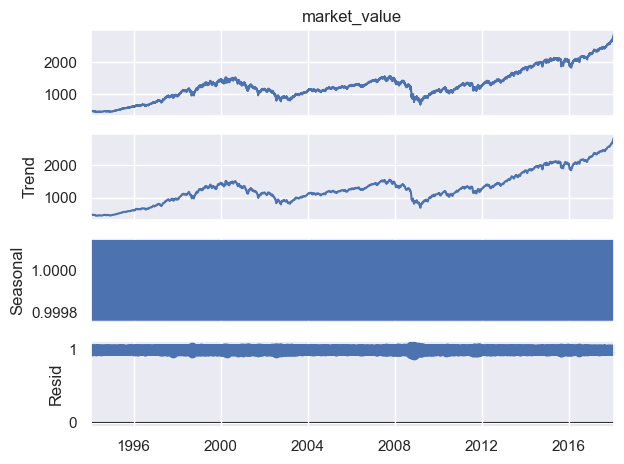

In [43]:
s_dec_multiplicative =seasonal_decompose(df_comp.market_value,model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

In [44]:
import statsmodels.graphics.tsaplots as sgt

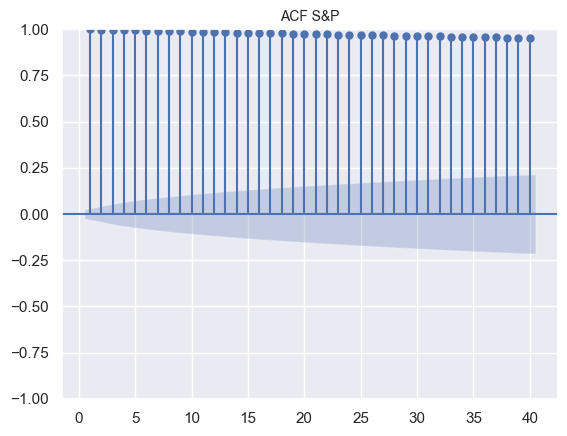

In [45]:
sgt.plot_acf(df_comp.market_value,lags= 40,zero=False)
plt.title('ACF S&P',size =10)
plt.show()

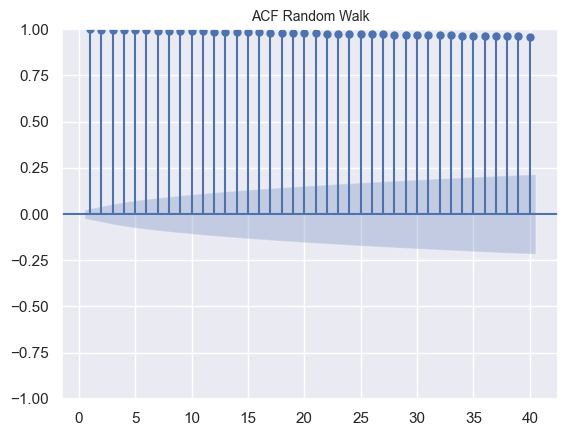

In [46]:
sgt.plot_acf(df_comp.rw,lags= 40,zero=False)
plt.title('ACF Random Walk',size =10)
plt.show()

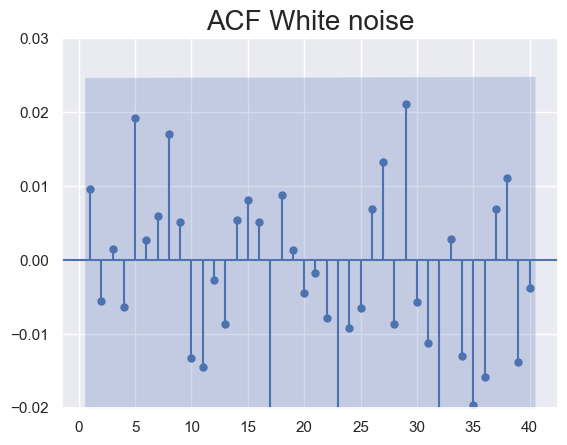

In [47]:
sgt.plot_acf(df_comp.Wn,lags= 40,zero=False)
plt.title('ACF White noise',size =20)
plt.ylim(-.02,.03)
plt.show()

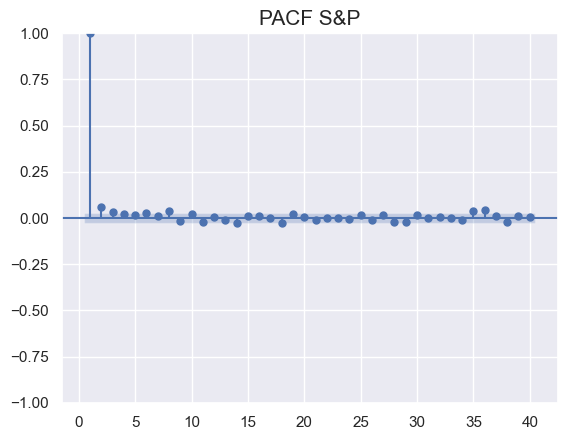

In [48]:
sgt.plot_pacf(df_comp.market_value,lags= 40,zero=False,method='ols')
plt.title('PACF S&P',size =15)
plt.show()

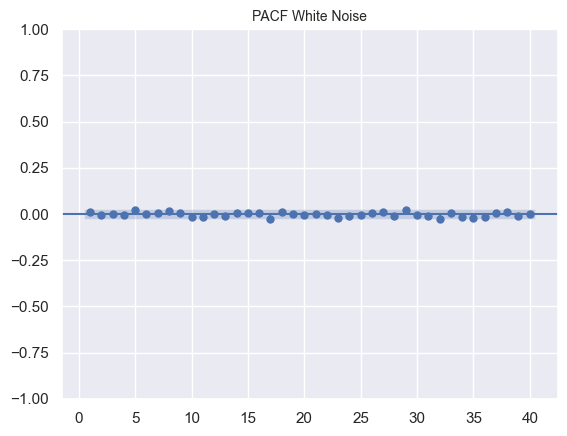

In [49]:
sgt.plot_pacf(df_comp.Wn,lags= 40,zero=False,method='ols')
plt.title('PACF White Noise',size =10)
plt.show()

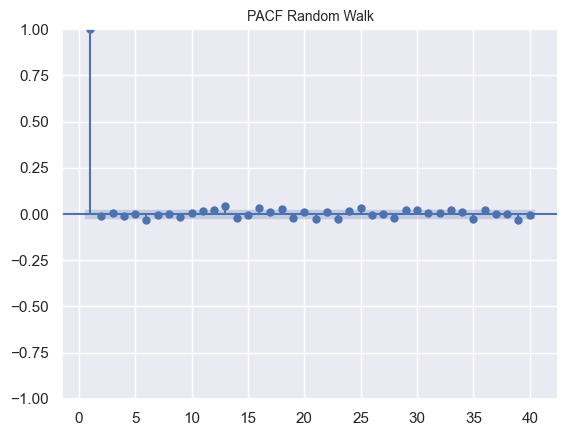

In [50]:
sgt.plot_pacf(df_comp.rw,lags= 40,zero=False,method='ols')
plt.title('PACF Random Walk',size =10)
plt.show()

 The AR(1) Model

In [51]:
from statsmodels.tsa.arima.model import ARIMA
model_ar = ARIMA(df_comp.market_value, order = (1,0,0))

In [52]:
results_ar =model_ar.fit()

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [53]:
print(results_ar.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -25274.921
Date:                Sat, 11 Nov 2023   AIC                          50555.842
Time:                        22:21:05   BIC                          50576.076
Sample:                    01-07-1994   HQIC                         50562.853
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.7920    571.796      2.254      0.024     168.093    2409.491
ar.L1          0.9998      0.000   2594.914      0.000       0.999       1.001
sigma2       183.8184      1.747    105.217      0.0

AR(2) model

In [54]:
model_ar2 = ARIMA(df_comp.market_value, order = (2,0,0))
results_ar2 =model_ar2.fit()
print(results_ar2.summary())

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -25264.990
Date:                Sat, 11 Nov 2023   AIC                          50537.980
Time:                        22:21:10   BIC                          50564.958
Sample:                    01-07-1994   HQIC                         50547.327
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6754    688.057      1.873      0.061     -59.892    2637.243
ar.L1          0.9439      0.008    114.869      0.000       0.928       0.960
ar.L2          0.0560      0.008      6.808      0.0

In [55]:
model_ar3 = ARIMA(df_comp.market_value, order = (3,0,0))
results_ar3 =model_ar3.fit()
print(results_ar3.summary())

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -25261.700
Date:                Sat, 11 Nov 2023   AIC                          50533.400
Time:                        22:21:17   BIC                          50567.123
Sample:                    01-07-1994   HQIC                         50545.085
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6592   1784.469      0.722      0.470   -2208.836    4786.155
ar.L1          0.9421      0.008    114.297      0.000       0.926       0.958
ar.L2          0.0259      0.011      2.402      0.0

In [56]:
model_ar4 = ARIMA(df_comp.market_value, order = (4,0,0))
results_ar4 =model_ar4.fit()
print(results_ar4.summary())

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -25260.641
Date:                Sat, 11 Nov 2023   AIC                          50533.281
Time:                        22:21:28   BIC                          50573.749
Sample:                    01-07-1994   HQIC                         50547.302
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6777   1788.622      0.720      0.471   -2216.957    4794.313
ar.L1          0.9415      0.008    114.256      0.000       0.925       0.958
ar.L2          0.0256      0.011      2.366      0.0

In [57]:
from scipy.stats import chi2

In [58]:
def LLR_test (mod_1,mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p= chi2.sf(LR,DF).round(3)
    return p

In [59]:
LLR_test(model_ar2, model_ar3)

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


0.01

In [60]:
LLR_test(model_ar3, model_ar4)

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.145

In [61]:
model_ar4 = ARIMA(df_comp.market_value, order=(4,0,0))
results_ar4 = model_ar4.fit()
print(results_ar4.summary())
print('Test LLR : ' + str(LLR_test(model_ar3, model_ar4)))

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -25260.641
Date:                Sat, 11 Nov 2023   AIC                          50533.281
Time:                        22:22:25   BIC                          50573.749
Sample:                    01-07-1994   HQIC                         50547.302
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6777   1788.622      0.720      0.471   -2216.957    4794.313
ar.L1          0.9415      0.008    114.256      0.000       0.925       0.958
ar.L2          0.0256      0.011      2.366      0.0

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test LLR : 0.145


In [62]:
df_comp['returns'] =df_comp.market_value.pct_change(1).mul(100)
df_comp=df_comp.iloc[1:]

In [63]:
sts.adfuller(df_comp.returns)

(-14.173447277641241,
 1.9848251568210712e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19221.15032513027)

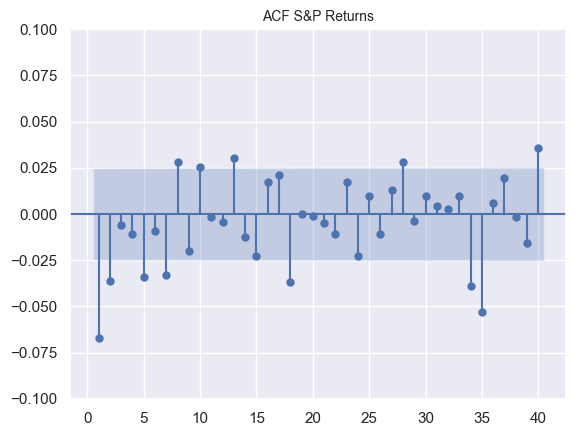

In [64]:
sgt.plot_acf(df_comp.returns,lags= 40,zero=False)
plt.title('ACF S&P Returns',size =10)
plt.ylim(-.10,.10)
plt.show()

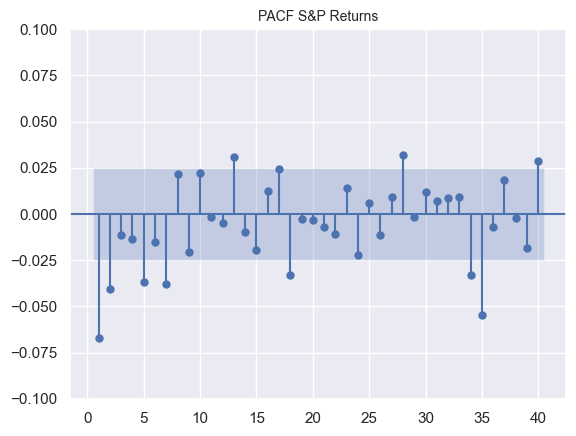

In [65]:
sgt.plot_pacf(df_comp.returns,lags= 40,zero=False,method='ols')
plt.title('PACF S&P Returns',size =10)
plt.ylim(-.10,.10)
plt.show()

AR(1) for Returns

In [66]:
model_ret_ar1 = ARIMA(df_comp.returns, order = (1,0,0))
results_ret_ar1 =model_ret_ar1.fit()
print(results_ret_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9667.195
Date:                Sat, 11 Nov 2023   AIC                          19340.391
Time:                        22:22:45   BIC                          19360.624
Sample:                    01-10-1994   HQIC                         19347.401
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0352      0.014      2.572      0.010       0.008       0.062
ar.L1         -0.0670      0.007     -9.230      0.000      -0.081      -0.053
sigma2         1.2748      0.010    131.938      0.0

Normalizing time series

In [67]:
benchmark= df_comp.market_value.iloc[0]

In [68]:
df_comp['norm'] =df_comp.market_value.div(benchmark)

In [69]:
sts.adfuller(df_comp.norm)

(1.1143250516472274,
 0.9953370456865513,
 10,
 6265,
 {'1%': -3.4313942109103537,
  '5%': -2.8620014488169447,
  '10%': -2.5670156262352637},
 -26686.434073118893)

In [70]:
bench_ret = df_comp.returns.iloc[0]
df_comp['norm_ret'] = df_comp.returns.div(bench_ret).mul(100)
sts.adfuller(df_comp.norm_ret)

(-14.173447277641257,
 1.9848251568209725e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 75036.80983902364)

Moving Average

In [71]:
df=df_comp

In [72]:
model_ret_ma1 = ARIMA(df.returns[1:],order =(0,0,1))
results_ret_ma1 = model_ret_ma1.fit()
print(results_ret_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6275
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -9664.492
Date:                Sat, 11 Nov 2023   AIC                          19334.984
Time:                        22:22:47   BIC                          19355.217
Sample:                    01-11-1994   HQIC                         19341.994
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.014      2.570      0.010       0.008       0.062
ma.L1         -0.0727      0.007    -10.007      0.000      -0.087      -0.058
sigma2         1.2743      0.010    130.848      0.0

In [73]:
model_ret_ma2 = ARIMA(df.returns[1:],order =(0,0,2))
results_ret_ma2 = model_ret_ma2.fit()
print(results_ret_ma2.summary())
print('\nLLR Test p-value = '+ str(LLR_test(model_ret_ma1,model_ret_ma2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6275
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -9659.931
Date:                Sat, 11 Nov 2023   AIC                          19327.862
Time:                        22:22:49   BIC                          19354.839
Sample:                    01-11-1994   HQIC                         19337.209
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.013      2.631      0.009       0.009       0.061
ma.L1         -0.0708      0.007     -9.722      0.000      -0.085      -0.057
ma.L2         -0.0389      0.006     -6.522      0.0

In [74]:
model_ret_ma3 = ARIMA(df.returns[1:],order =(0,0,3))
results_ret_ma3 = model_ret_ma3.fit()
print(results_ret_ma3.summary())
print('\nLLR Test p-value = '+ str(LLR_test(model_ret_ma2,model_ret_ma3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6275
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -9659.547
Date:                Sat, 11 Nov 2023   AIC                          19329.094
Time:                        22:22:52   BIC                          19362.816
Sample:                    01-11-1994   HQIC                         19340.778
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.013      2.644      0.008       0.009       0.061
ma.L1         -0.0707      0.007     -9.696      0.000      -0.085      -0.056
ma.L2         -0.0390      0.006     -6.522      0.0

In [75]:
model_ret_ma4 = ARIMA(df.returns[1:],order =(0,0,4))
results_ret_ma4 = model_ret_ma4.fit()
print(results_ret_ma4.summary())
print('\nLLR Test p-value = '+ str(LLR_test(model_ret_ma3,model_ret_ma4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6275
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -9658.639
Date:                Sat, 11 Nov 2023   AIC                          19329.278
Time:                        22:22:57   BIC                          19369.744
Sample:                    01-11-1994   HQIC                         19343.299
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.013      2.661      0.008       0.009       0.061
ma.L1         -0.0718      0.007     -9.807      0.000      -0.086      -0.057
ma.L2         -0.0387      0.006     -6.454      0.0

In [76]:
model_ret_ma5 = ARIMA(df.returns[1:],order =(0,0,5))
results_ret_ma5 = model_ret_ma5.fit()
print(results_ret_ma5.summary())
print('\nLLR Test p-value = '+ str(LLR_test(model_ret_ma4,model_ret_ma5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6275
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -9654.281
Date:                Sat, 11 Nov 2023   AIC                          19322.561
Time:                        22:23:03   BIC                          19369.772
Sample:                    01-11-1994   HQIC                         19338.919
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.013      2.748      0.006       0.010       0.060
ma.L1         -0.0720      0.007     -9.774      0.000      -0.086      -0.058
ma.L2         -0.0404      0.006     -6.730      0.0

Residuals Returns

In [77]:
df['res_ret_ma5'] =results_ret_ma5.resid[1:]

In [78]:
print('The mean of the residuals is ' + str(round(df.res_ret_ma5.mean(),3)) + '\nThe variance of the residuals is ' +str(round(df.res_ret_ma5.var(),3)))

The mean of the residuals is 0.0
The variance of the residuals is 1.271


In [79]:
import math
std_res=round(math.sqrt(df.res_ret_ma5.var()),3)
std_res

1.127

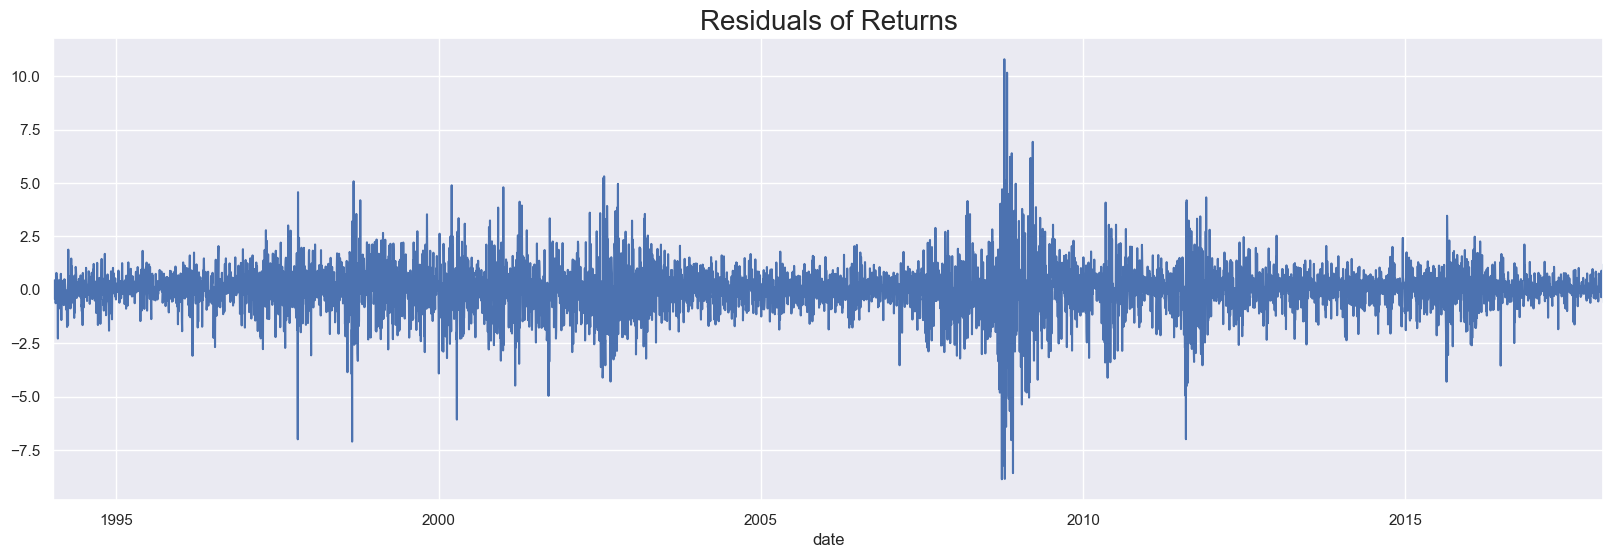

In [80]:
df.res_ret_ma5[1:].plot(figsize=(20,6))
plt.title('Residuals of Returns',size =20)
plt.show()

In [81]:
sts.adfuller(df.res_ret_ma5[2:])

(-14.119206603609335,
 2.4417878109146165e-26,
 34,
 6239,
 {'1%': -3.43139856427888,
  '5%': -2.8620033722813014,
  '10%': -2.567016650141434},
 19217.255382291536)

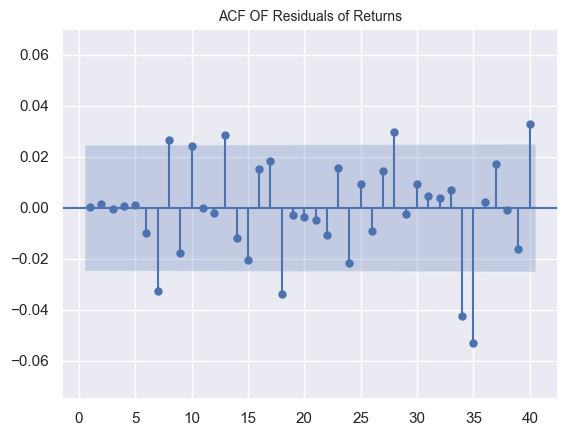

In [82]:
sgt.plot_acf(df.res_ret_ma5[2:],lags= 40,zero=False)
plt.title('ACF OF Residuals of Returns',size =10)
plt.ylim(-.075,.070)
plt.show()

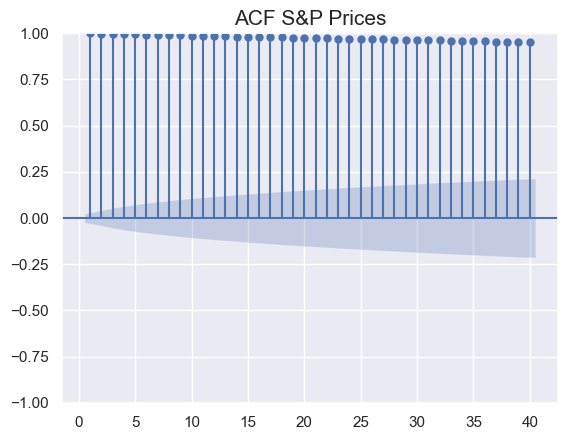

In [83]:
sgt.plot_acf(df.market_value,lags= 40,zero=False)
plt.title('ACF S&P Prices',size =15)
plt.show()

In [84]:
model_ma1 = ARIMA(df.market_value,order =(0,0,1))
results_ma1 = model_ma1.fit()
print(results_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6276
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -43539.939
Date:                Sat, 11 Nov 2023   AIC                          87085.879
Time:                        22:23:13   BIC                          87106.112
Sample:                    01-10-1994   HQIC                         87092.889
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.8039      6.874    187.486      0.000    1275.331    1302.277
ma.L1          0.9790      0.002    484.990      0.000       0.975       0.983
sigma2      6.211e+04   1162.711     53.417      0.0

ARMA(1,1)

In [85]:
model_ret_ar1_ma1 = ARIMA(df.returns[1:],order =(1,0,1))
results_ret_ar1_ma1 = model_ret_ar1_ma1.fit()
print(results_ret_ar1_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6275
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9656.802
Date:                Sat, 11 Nov 2023   AIC                          19321.604
Time:                        22:23:16   BIC                          19348.582
Sample:                    01-11-1994   HQIC                         19330.952
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.013      2.739      0.006       0.010       0.060
ar.L1          0.6371      0.046     13.966      0.000       0.548       0.727
ma.L1         -0.7032      0.041    -17.051      0.0

In [86]:
model_ret_ar1 = ARIMA(df.returns[1:],order=(1,0,0))
model_ret_ma1 = ARIMA(df.returns[1:],order=(0,0,1))

In [87]:
print('\nARMA Vs AR',LLR_test(model_ret_ar1,model_ret_ar1_ma1))
print('\nARMA Vs MA',LLR_test(model_ret_ma1,model_ret_ar1_ma1))


ARMA Vs AR 0.0

ARMA Vs MA 0.0


In [88]:
model_ret_ar3_ma3 = ARIMA(df.returns[1:],order =(3,0,3))
results_ret_ar3_ma3 = model_ret_ar3_ma3.fit()

In [89]:
LLR_test(model_ret_ar1_ma1,model_ret_ar3_ma3,DF = 4)

0.757

In [90]:
print(results_ret_ar3_ma3.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6275
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -9655.861
Date:                Sat, 11 Nov 2023   AIC                          19327.722
Time:                        22:23:51   BIC                          19381.677
Sample:                    01-11-1994   HQIC                         19346.417
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.014      2.469      0.014       0.007       0.063
ar.L1          0.7497      1.379      0.544      0.587      -1.953       3.453
ar.L2          0.7986      0.346      2.309      0.0

In [91]:
model_ret_ar2_ma2 = ARIMA(df.returns[1:],order =(2,0,2))
results_ret_ar2_ma2 = model_ret_ar2_ma2.fit()
LLR_test(model_ret_ar1_ma1,model_ret_ar2_ma2,DF = 2)

0.623

In [92]:
print(results_ret_ar2_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6275
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -9656.329
Date:                Sat, 11 Nov 2023   AIC                          19324.659
Time:                        22:24:10   BIC                          19365.125
Sample:                    01-11-1994   HQIC                         19338.680
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.013      2.675      0.007       0.009       0.061
ar.L1          0.8446      0.637      1.326      0.185      -0.404       2.094
ar.L2         -0.0845      0.401     -0.211      0.8

In [93]:
model_ret_ar2_ma1 = ARIMA(df.returns[1:],order =(2,0,1))
results_ret_ar2_ma1 = model_ret_ar2_ma1.fit()
LLR_test(model_ret_ar1_ma1,model_ret_ar2_ma1)

0.361

In [94]:
model_ret_ar1_ma2 = ARIMA(df.returns[1:],order =(1,0,2))
results_ret_ar1_ma2 = model_ret_ar1_ma2.fit()
LLR_test(model_ret_ar1_ma1,model_ret_ar1_ma2)

0.353

ARIMA Model

In [95]:
model_ar1_i1_ma1 = ARIMA(df.market_value,order =(1,1,1))
results_ar1_i1_ma1 = model_ar1_i1_ma1.fit()
print(results_ar1_i1_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25246.079
Date:                Sat, 11 Nov 2023   AIC                          50498.157
Time:                        22:24:34   BIC                          50518.390
Sample:                    01-10-1994   HQIC                         50505.168
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6390      0.062     10.334      0.000       0.518       0.760
ma.L1         -0.6952      0.057    -12.205      0.000      -0.807      -0.584
sigma2       182.8523      1.742    104.985      0.0

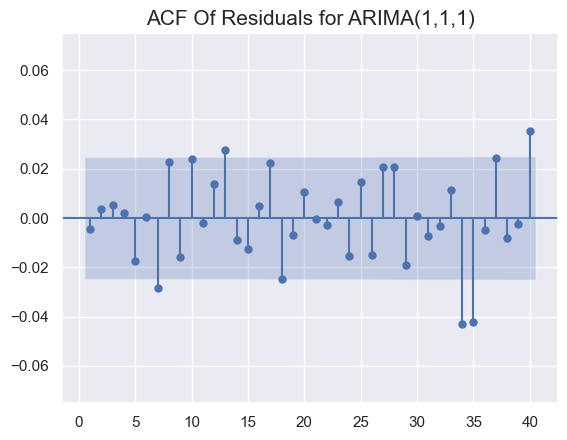

In [96]:
df['res_ar1_i1_ma1']=results_ar1_i1_ma1.resid
sgt.plot_acf(df.res_ar1_i1_ma1[1:],lags= 40,zero=False)
plt.title('ACF Of Residuals for ARIMA(1,1,1)',size =15)
plt.ylim(-.075,.075)
plt.show()

In [97]:
model_ar1_i1_ma2 = ARIMA(df.market_value,order =(1,1,2))
results_ar1_i1_ma2 = model_ar1_i1_ma2.fit()
print(results_ar1_i1_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -25245.946
Date:                Sat, 11 Nov 2023   AIC                          50499.891
Time:                        22:24:39   BIC                          50526.869
Sample:                    01-10-1994   HQIC                         50509.239
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6811      0.091      7.472      0.000       0.502       0.860
ma.L1         -0.7406      0.091     -8.123      0.000      -0.919      -0.562
ma.L2          0.0091      0.012      0.739      0.4

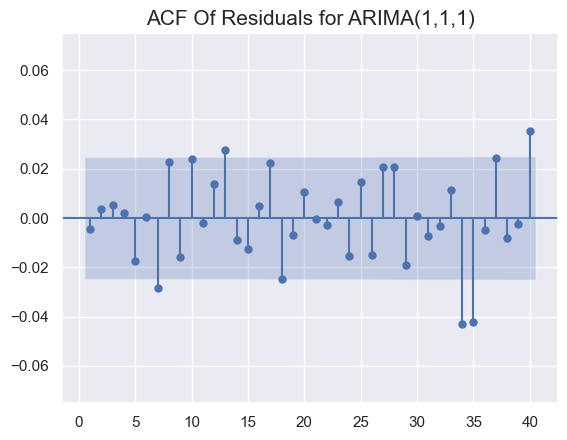

In [98]:
df['res_ar1_i1_ma2']=results_ar1_i1_ma2.resid
sgt.plot_acf(df.res_ar1_i1_ma1[1:],lags= 40,zero=False)
plt.title('ACF Of Residuals for ARIMA(1,1,1)',size =15)
plt.ylim(-.075,.075)
plt.show()

In [99]:
df['delta_price'] = df.market_value.diff(1)

In [100]:
model_delta_ar1_i1_ma1 = ARIMA(df.delta_price,order =(1,1,1))
results_delta_ar1_i1_ma1 = model_delta_ar1_i1_ma1.fit()
print(results_delta_ar1_i1_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:            delta_price   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25258.445
Date:                Sat, 11 Nov 2023   AIC                          50522.890
Time:                        22:24:43   BIC                          50543.123
Sample:                    01-10-1994   HQIC                         50529.900
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0574      0.008     -6.948      0.000      -0.074      -0.041
ma.L1         -0.9991      0.001  -1566.306      0.000      -1.000      -0.998
sigma2       183.1738      1.730    105.864      0.0

In [101]:
sts.adfuller(df.delta_price[1:])

(-14.166984464683145,
 2.03422002641463e-26,
 34,
 6240,
 {'1%': -3.4313983961705303,
  '5%': -2.8620032980054413,
  '10%': -2.567016610602605},
 50242.19486685827)

SARIMAX

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [103]:
model_sarimax = SARIMAX(df.market_value,exog=df.Wn,order=(1,1,1))
results_sarimax =model_sarimax.fit()
print(results_sarimax.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6276
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -25246.129
Date:                Sat, 11 Nov 2023   AIC                          50500.259
Time:                        22:24:48   BIC                          50527.236
Sample:                    01-10-1994   HQIC                         50509.606
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Wn            -0.0003      0.000     -1.148      0.251      -0.001       0.000
ar.L1          0.5122      0.077      6.649      0.000       0.361       0.663
ma.L1         -0.5740      0.072     -7.940      0.0

ARCH

In [104]:
df['returns'] = df.market_value.pct_change(1)*100

In [105]:
df['sq_returns']= df.returns.mul(df.returns)

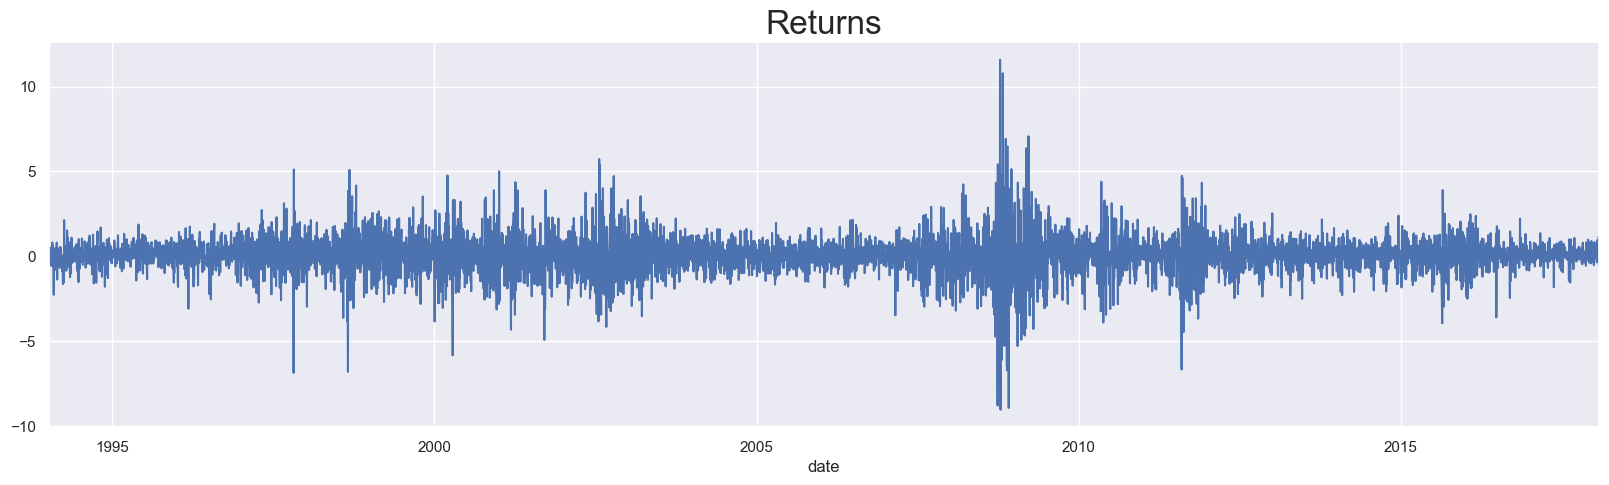

In [106]:
df.returns.plot(figsize=(20,5))
plt.title('Returns',size =24)
plt.show()

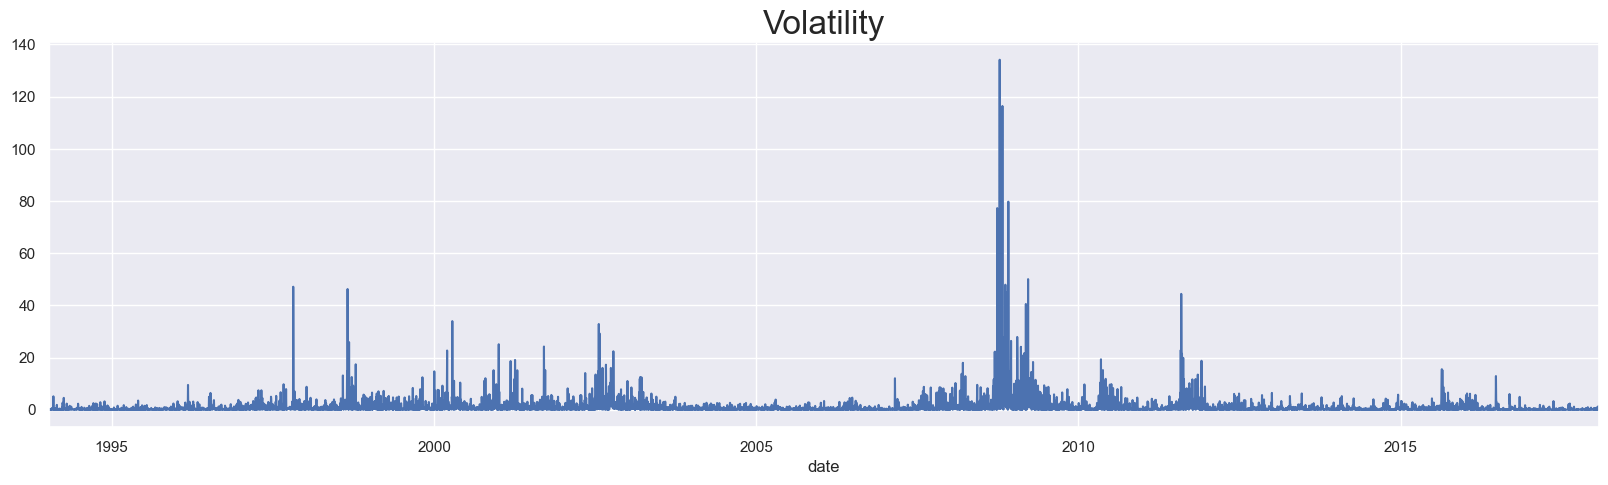

In [107]:
df.sq_returns.plot(figsize=(20,5))
plt.title('Volatility',size =24)
plt.show()

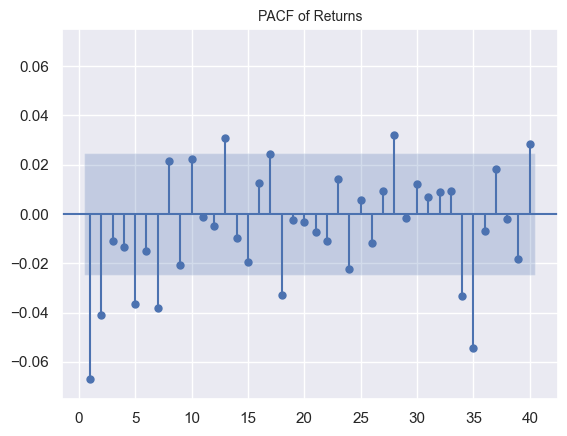

In [108]:
sgt.plot_pacf(df.returns[1:],lags= 40,alpha=.05,zero=False,method='ols')
plt.title('PACF of Returns',size =10)
plt.ylim(-.075,.075)
plt.show()


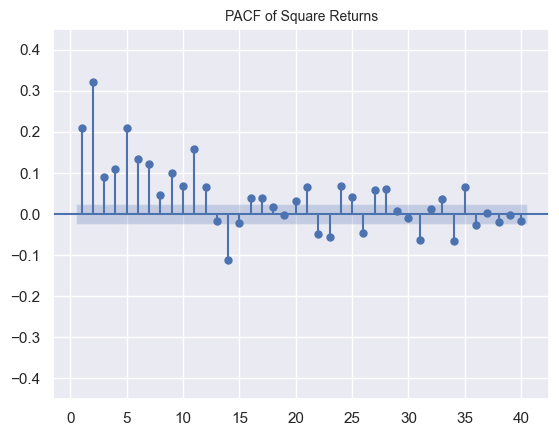

In [109]:
sgt.plot_pacf(df.sq_returns[1:],lags= 40,alpha=.05,zero=False,method='ols')
plt.title('PACF of Square Returns',size =10)
plt.ylim(-.45,.45)
plt.show()

In [110]:
!pip install arch

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
from arch import arch_model

In [112]:
model_arch1 = arch_model(df.returns[1:])
results_arch1 = model_arch1.fit()
print(results_arch1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 326208058097.60095
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3485196422.4215302
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8391.897078913404
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8365.285507441058
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8469.480917009683
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8303.438224684536
Iteration:      7,   Func. Count:     47,   Neg. LLF: 9001.881959781367
Iteration:      8,   Func. Count:     54,   Neg. LLF: 8314.709199719051
Iteration:      9,   Func. Count:     60,   Neg. LLF: 8294.298432107355
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8294.29686306709
Iteration:     11,   Func. Count:     70,   Neg. LLF: 8294.296851351031
Iteration:     12,   Func. Count:     74,   Neg. LLF: 8294.296851352985
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8294.296851351031
            Iterations: 12


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with 

In [113]:
model_arch1 = arch_model(df.returns[1:],mean='constant',vol='ARCH',p=1)
results_arch1 = model_arch1.fit()
print(results_arch1.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 38989.77166971617
Iteration:      2,   Func. Count:     13,   Neg. LLF: 14512.890402051571
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9578.98733665509
Iteration:      4,   Func. Count:     26,   Neg. LLF: 9352.06206276457
Iteration:      5,   Func. Count:     30,   Neg. LLF: 9352.06205934838
Iteration:      6,   Func. Count:     33,   Neg. LLF: 9352.062059348384
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9352.06205934838
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9352.06
Distribution:                  Normal   AIC:    

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with 